In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv')
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

По описанию данных можно сделать вывод о том, что признаки в целом можно разделить на три больших блока: среднее по измерениям (mean), стандартная ошибка (se) и среднее по трем наибольшим значениям (worst).

## EDA

In [3]:
data.shape

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

Очевидно, что последний столбец не несёт никакого смысла, поэтому удаляем его. Также сразу можем убрать столбцы с уникальными данными (id).

In [6]:
data = data.drop(columns=['Unnamed: 32', 'id'], axis=1)
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

<AxesSubplot:>

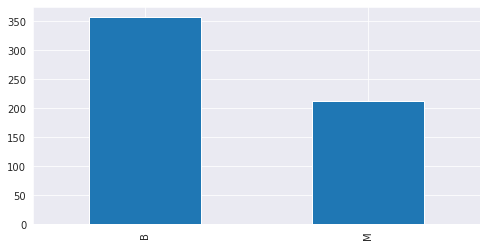

In [8]:
data['diagnosis'].value_counts().plot.bar(figsize=(8, 4))

In [9]:
data['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

Можем сделать вывод, что классы несбалансированные.

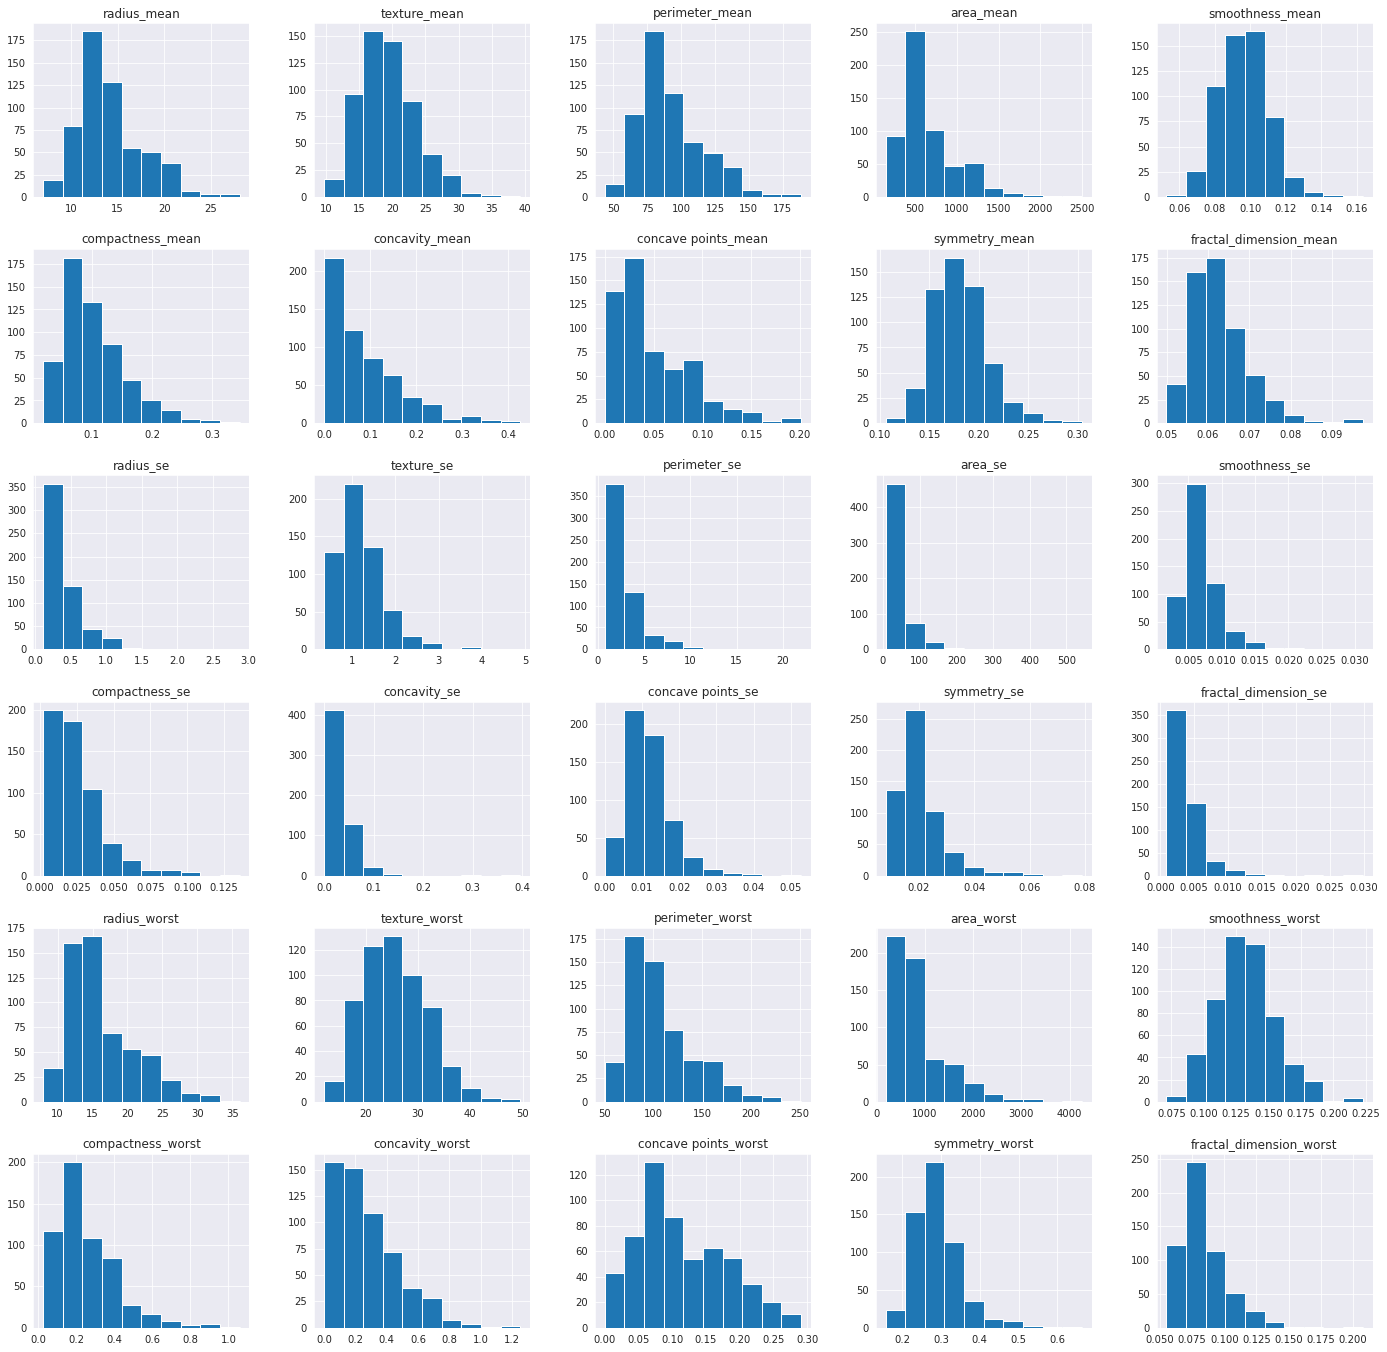

In [10]:
data.hist(figsize=(24, 24));

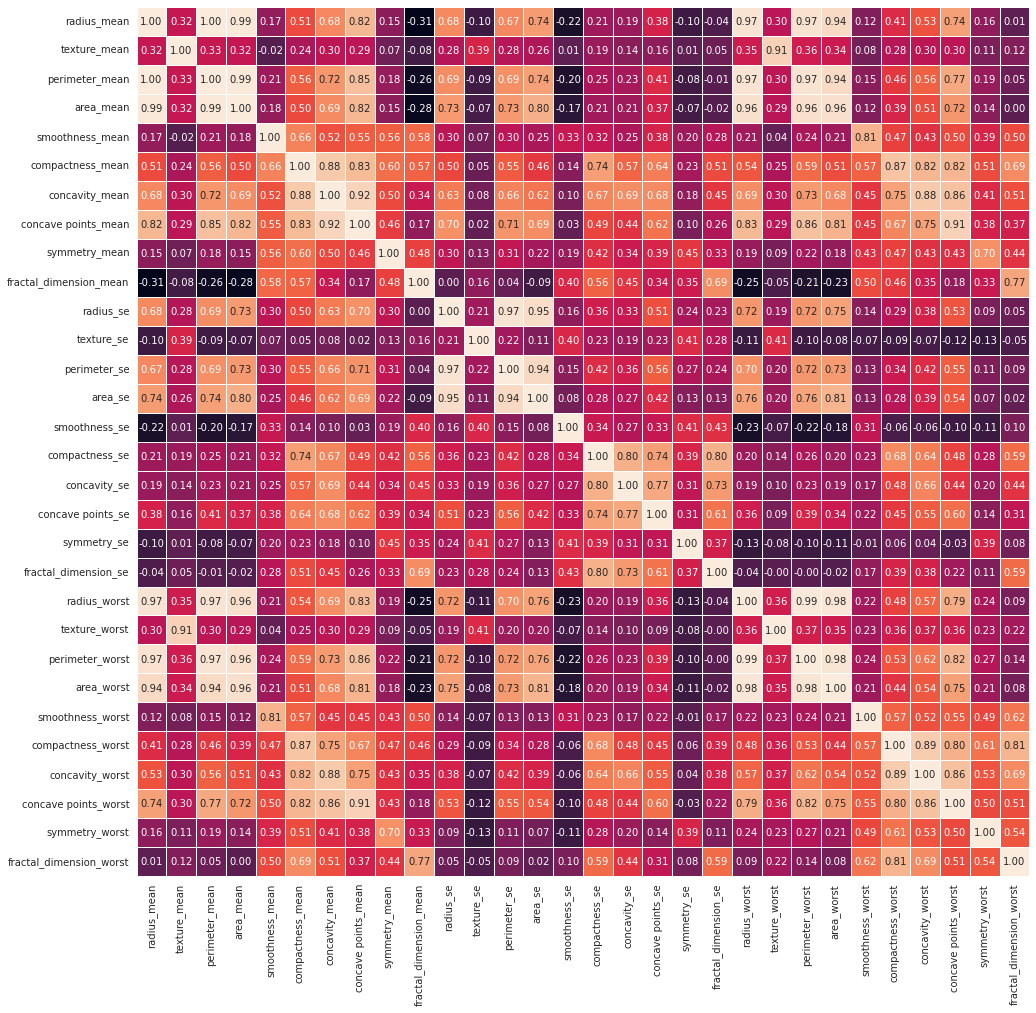

In [11]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Отчетливо видно, что в данных присутствуют очень скоррелированные друг с другом блоки признаков, связанных с размером (радиус, периметр и площадь окружности).

При этом очевидно, что площадь и периметр являются производными от радиуса. Периметр окружности (perimeter) 2πr. Площадь окружности (area) π × r2.

Также из описания к данным видим, что признаки compactness зависят от радиуса и площади perimeter^2 / area - 1.0.

Но необходимо проверить, что это действительно так.

In [12]:
dimensions = data[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'diagnosis']]

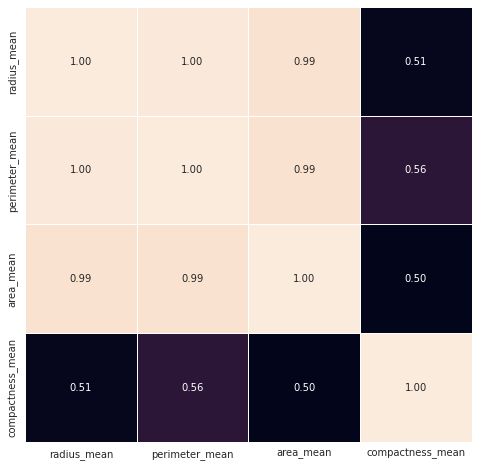

In [13]:
plt.figure(figsize=(8, 8))
sns.heatmap(dimensions.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

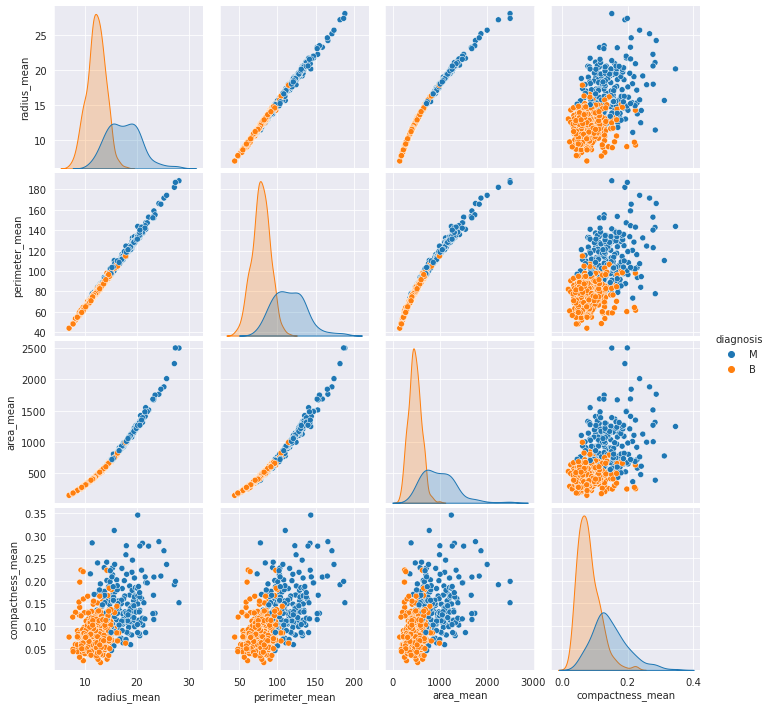

In [14]:
sns.pairplot(dimensions, hue='diagnosis');

Попробуем посчитать площадь, периметр и компактность самостоятельно.

In [15]:
dimensions['area_calc'] = dimensions['radius_mean'] * dimensions['radius_mean'] * np.pi
dimensions['perimeter_calc'] = dimensions['radius_mean'] * 2 * np.pi
dimensions['compactness_calc'] = ((dimensions['perimeter_mean'] * dimensions['perimeter_mean']) / dimensions['area_mean']) - 1.0

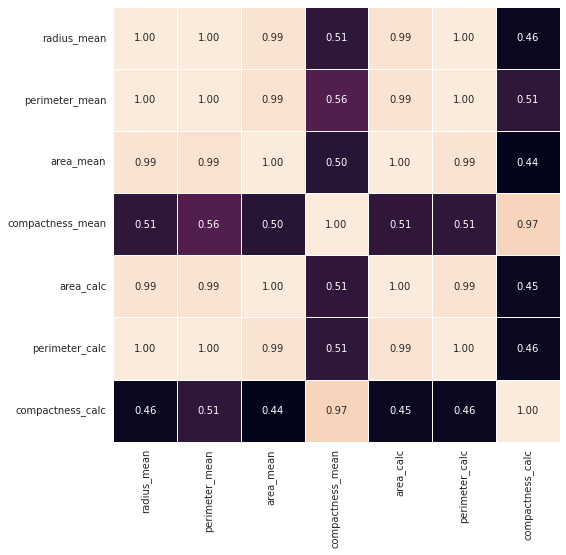

In [16]:
plt.figure(figsize=(8, 8))
sns.heatmap(dimensions.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Что и требовалось доказать: расчетные периметр, площадь и компактность коррелируют с исходными признаками из датасета на 100% (ну или почти на 100%).

Следовательно, надо выбрать какой из этих признаков имеет большую корреляцию с прочими, не особо связанными с размерами, признаками и оставить его в качестве фичи.

Закодируем значения таргета числами. 0 - злокачественная опухоль, 1 - доброкачественная опухоль.

In [17]:
data['diagnosis_numeric'] = data['diagnosis'].replace({'M': 0, 'B': 1})

Теперь для каждой группы признаков с размером проверим корреляцию с целевой переменной.

In [18]:
dimensions_mean = data[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'diagnosis_numeric']]
dimensions_se = data[['radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'diagnosis_numeric']]
dimensions_worst = data[['radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'diagnosis_numeric']]

In [19]:
k = 5
corrmat = dimensions_mean.corr()
corrmat.nlargest(k, 'diagnosis_numeric')['diagnosis_numeric']

diagnosis_numeric    1.000000
compactness_mean    -0.596534
area_mean           -0.708984
radius_mean         -0.730029
perimeter_mean      -0.742636
Name: diagnosis_numeric, dtype: float64

In [20]:
k = 5
corrmat = dimensions_se.corr()
corrmat.nlargest(k, 'diagnosis_numeric')['diagnosis_numeric']

diagnosis_numeric    1.000000
compactness_se      -0.292999
area_se             -0.548236
perimeter_se        -0.556141
radius_se           -0.567134
Name: diagnosis_numeric, dtype: float64

In [21]:
k = 5
corrmat = dimensions_worst.corr()
corrmat.nlargest(k, 'diagnosis_numeric')['diagnosis_numeric']

diagnosis_numeric    1.000000
compactness_worst   -0.590998
area_worst          -0.733825
radius_worst        -0.776454
perimeter_worst     -0.782914
Name: diagnosis_numeric, dtype: float64

Здесь можно сделать вывод, что наилучшая корреляция с целевой переменной проявляется у радиуса и периметра, а наименьшая у компактности.

При этом еще стоит отметить, что наилучшим образом скоррелированность с целевой переменной видна у блоков mean и worst.

Оставим в данных только значения радиуса, т.к. он является исходным измерением, а не производным от чего-либо еще.

In [22]:
column_to_drop = ['compactness_mean', 'area_mean', 'perimeter_mean',
                     'compactness_se', 'area_se', 'perimeter_se',
                     'compactness_worst', 'area_worst', 'perimeter_worst']
data = data.drop(column_to_drop, axis=1)

Построим еще раз общую тепловую карту и гистрограммы.

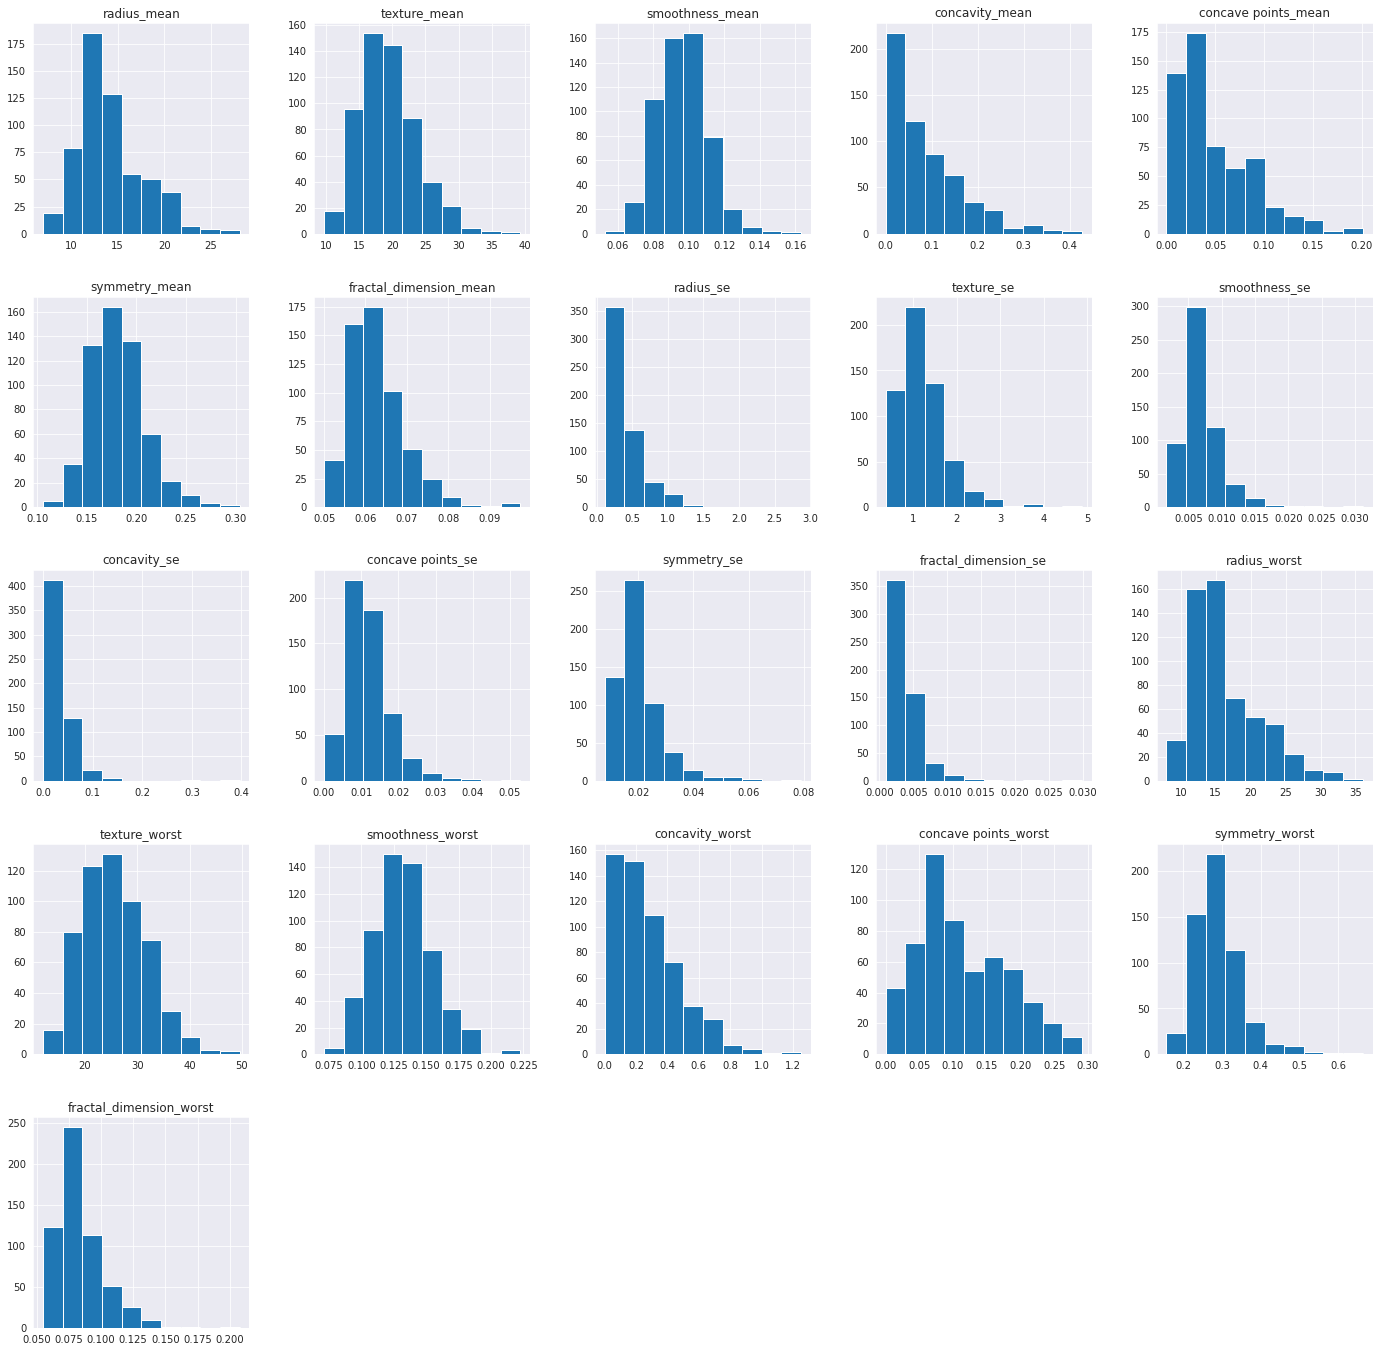

In [23]:
data.drop(['diagnosis_numeric'], axis=1).hist(figsize=(24, 24));

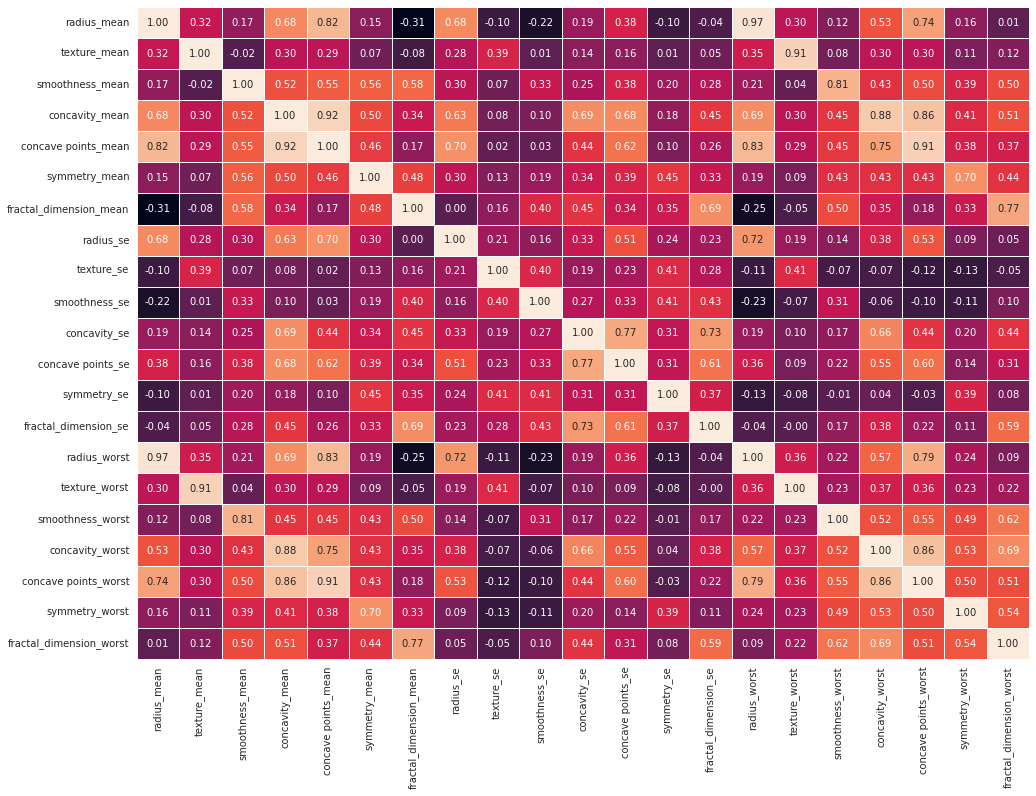

In [24]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.drop(['diagnosis_numeric'], axis=1).corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

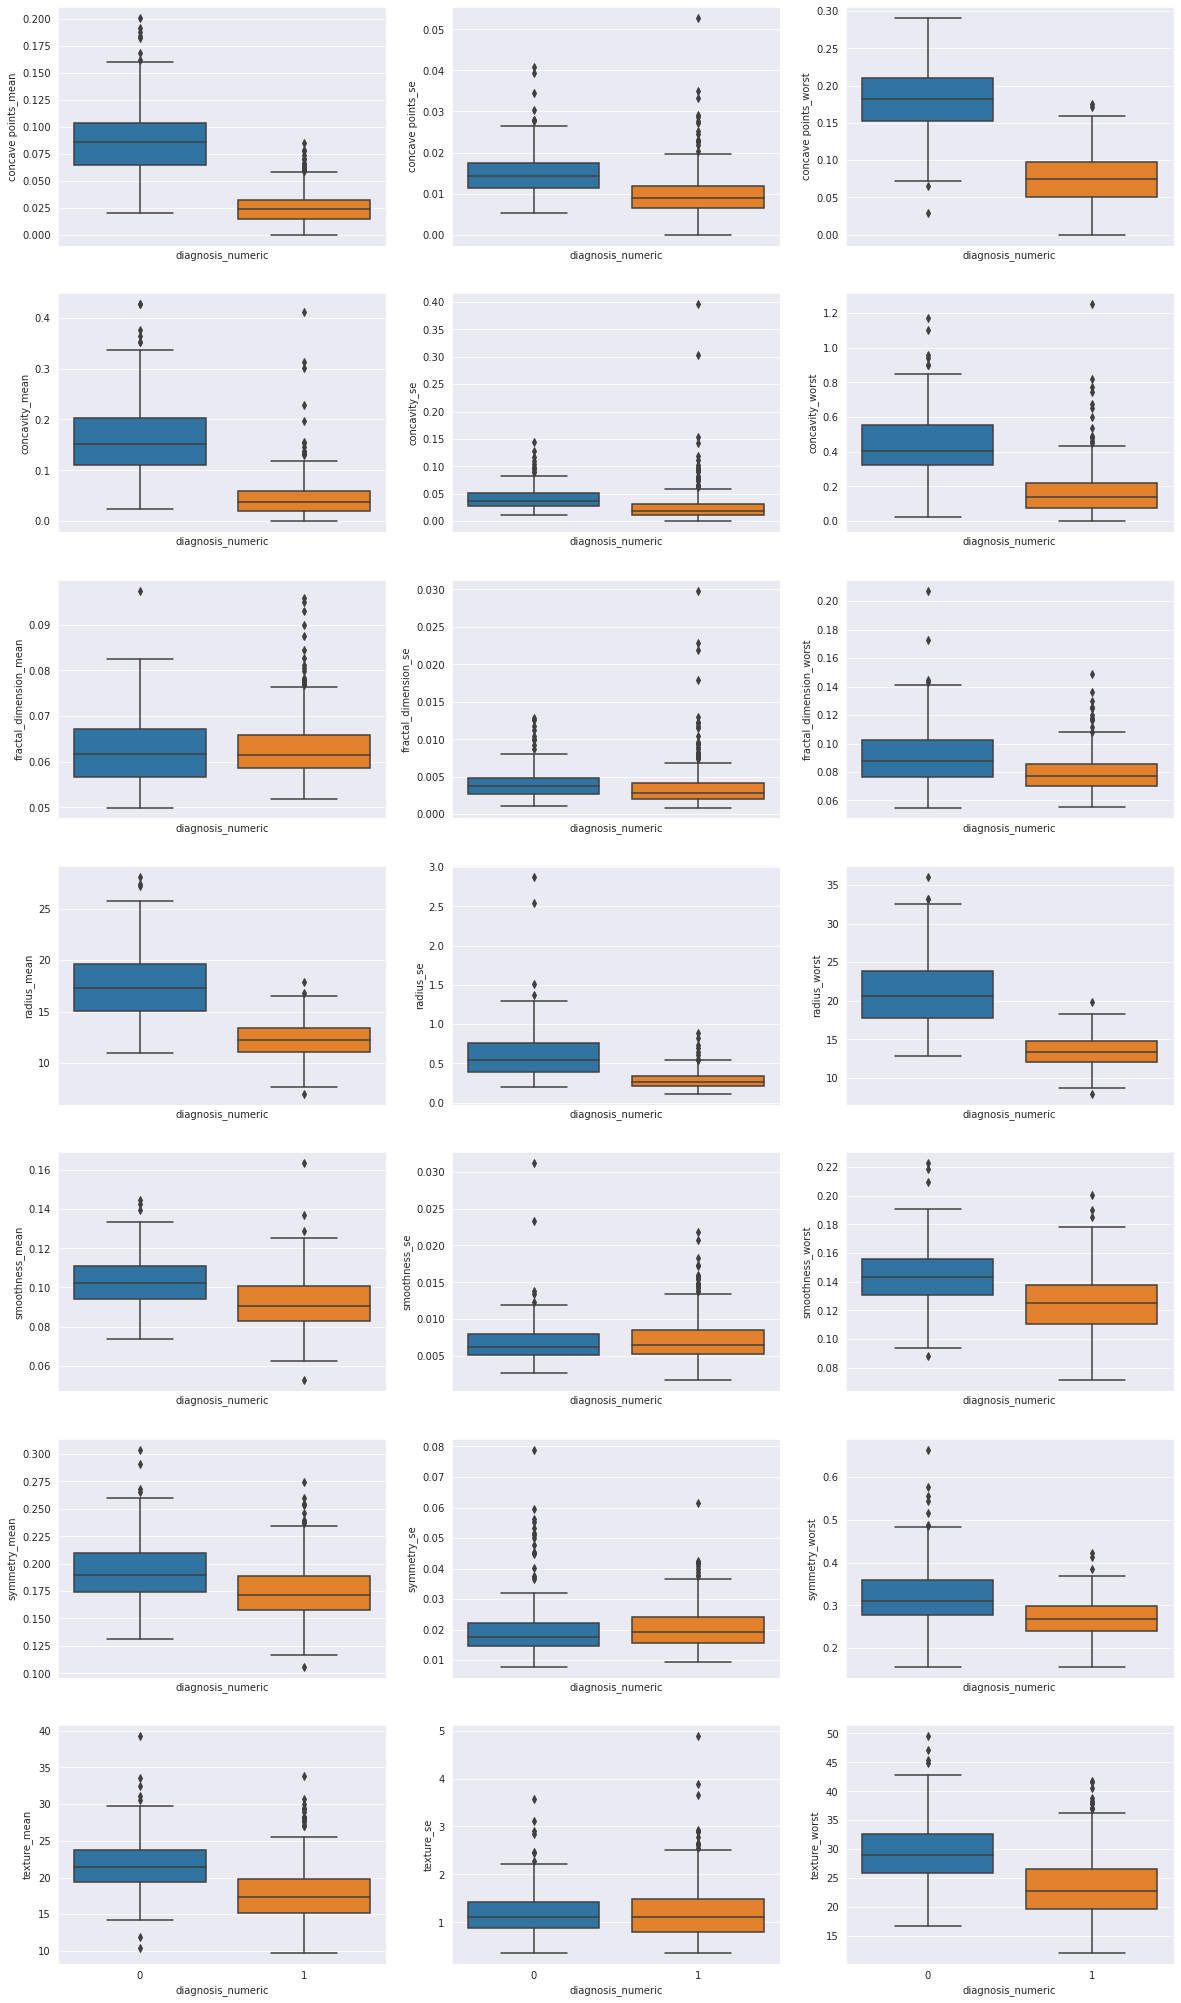

In [25]:
column_names = list(data.drop(['diagnosis_numeric', 'diagnosis'], axis=1))
column_names = sorted(column_names, key=lambda x: x.split("_")[0])
fig, axes = plt.subplots(len(column_names) // 3, 3, sharex=True, figsize=(20,36))
for i in range(len(column_names)):
    sns.boxplot(data=data, x='diagnosis_numeric', y=column_names[i], ax=axes[i // 3, i % 3])
plt.show()

Исходя из того, что мы видим из распределений, можно сделать вывод, что наиболее удобно отделять злокачественную и доброкачественную опухоль по максимальному радиусу (radius_worst), средней вогнутости (concavity_mean) и максимальному числу вогнутых точек (concave_points_worst), т.к. у этих переменных медианные значения для доброкачественной и злокачественной опухоли довольно сильно отличаются. При этом у радиуса и числа вогнутых точек имеется малое число выбросов, а у вогнутости - большое.
Также переменные максимальной текстуры (texture_worst), гладкости (smoothness_worst) и симметрии (symmetry_worst) имеют неплохое распределение, но большое число выбросов.

Самой "бесполезной" переменной видится фрактальная размерность (fractal dimension), т.к. она практически не отличается для видов опухоли, а также имеет много выбросов.

Сформируем итоговый датасет.

In [26]:
clean_column_names = ['radius_worst', 'concavity_mean', 'concave points_worst', 
                      'texture_worst', 'smoothness_worst', 'symmetry_worst']
feature = data[clean_column_names]
feature['diagnosis'] = data['diagnosis_numeric']

## Baseline kNN

In [27]:
from sklearn.model_selection import train_test_split

Поскольку наши классы несбалансированные, нужно выполнить разбиение со стратификацией.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    feature.drop(['diagnosis'], axis=1), 
    feature['diagnosis'], 
    test_size=0.30, 
    random_state=42, 
    stratify=feature['diagnosis']
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

Для оценки будем использовать все метрики подходящие для задач классификации метрики.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    roc_auc = roc_auc_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}\nROC-AUC:  {:.3f}".format(
        accuracy, precision, recall, f1, roc_auc
    ))

Поскольку алгоритм kNN основан на расчете расстояния, то признаки с широким диапазоном значений могут вносить больший вклад. Этого нельзя допускать, поэтому значения необходимо нормализовать.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Обучим kNN из коробки, взял количество соседений наугад.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [ ]:
quality(y_pred, y_test)

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knn, X_test_scaled, y_test)

"Из коробки" получились вполне неплохие результаты, судя по метрикам. F-мера имеет достаточно высокое значение.

Теперь попробуем подобрать оптимальное число соседей на кросс-валидации. Основываться будем на метрике F1.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
        'n_neighbors': range(1, 10),
        'p': range(1, 2)
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}, best CV p: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors, grid_search.best_estimator_.p)
) 


y_pred = grid_search.best_estimator_.predict(X_test_scaled)
quality(y_pred, y_test)

Видим, что с 3 соседями качество неплохо высросло. Остановимся на таком варианте.